# Exercise 05 - Size optimization of trusses
We will optimize truss structures in this exercise. There is a prepared Python class for trusses called `Truss` and you can import it via `from torchfem import Truss`. The next cells show an example of how to use the truss class.

In [6]:
from math import log, sqrt

import torch
from torchfem import Truss

torch.set_default_dtype(torch.double)

The truss consists of `nodes` (tensor with shape Nx2), `elements`(integer tensor with shape Mx2), `forces` (tensor with shape Nx2) acting on nodes, constraints (boolean tensor with shape Nx2) defining for each degree of freedom wether it is constrained (`True`) or not (`False`), prescribed displacements (tensor with shape Nx2), cross section areas `A` of each element (tensor with shape Mx1), and Young's moduli `E` of each element (tensor with shape Mx1). These arguments are passed into the `Truss` class to create a new `Truss` object. We can plot the object with `Truss.plot()`.

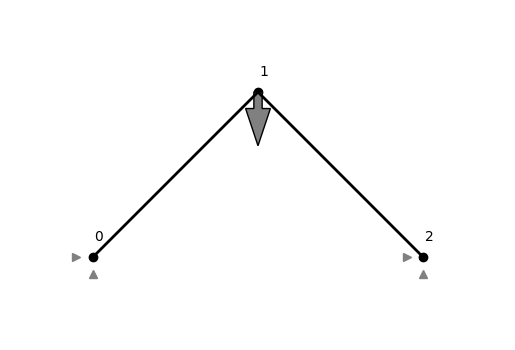

In [7]:
# Define three nodes
nodes = torch.tensor([[0.0, 0.0], [1.0, 1.0], [2.0, 0.0]])

# Define two elements connecting nodes
elements = torch.tensor([[0, 1], [1, 2]])

# Define a single force downwards in x_2 direction
forces = torch.zeros_like(nodes)
forces[1, 1] = -0.25

# Constrain all DOFs except for the central node
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[0, :] = True
constraints[2, :] = True

# Define initial cross sectional areas and Young's moduli
A = torch.ones((len(elements)))
E = torch.ones((len(elements)))

# Define truss
sample_truss = Truss(nodes, elements, forces, displacements, constraints, A, E)

# Plot undeformend truss
sample_truss.plot()

We can solve the truss problem for deformations at each node. This is done with a function `Truss.solve()`. The function returns displacements at each node `u` and forces at each node `f`. 

We may compute stresses as as post-processing step via `Truss.compute_stress(u)`, which returns the stress in each bar.

If we pass the displacements to the `Truss.plot()` function via `Truss.plot(u=u)`, the visualization shows the deformed configuration. If we pass stresses via `Truss.plot(sigma=sigma)`, the visualization shows color-coded stress in each bar. 

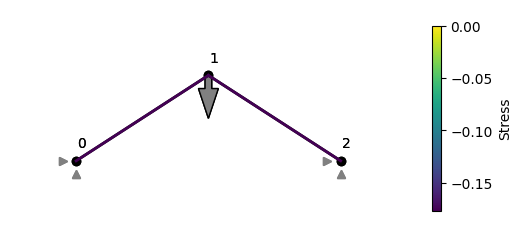

In [8]:
# Compute the solution of the truss problem
u, f = sample_truss.solve()

# Compute the stresses in each element
sigma = sample_truss.compute_stress(u)

# Plot deformend truss
sample_truss.plot(u=u)

# Plot deformend truss with stresses
sample_truss.plot(u=u, sigma=sigma)

## Task 1 - Solving a simple truss structure
Consider the three bar truss example from a previous exercise and the lecture example shown below. The coordinate origin is located at Node 1 now. 

![Three bar truss](https://meyer-nils.github.io/structural_optimization/figures/three_bar_truss.png)

The truss is subjected to a force $P=-0.2$ indicated by the gray arrow and supports indicated by gray triangles. It has three nodes 
$$
    \mathcal{N} = \{\mathbf{n}^0=(1,0)^\top, \mathbf{n}^1=(0,0)^\top,\mathbf{n}^2=(0,1)^\top \}
$$
and three elements 
$$
    \mathcal{E} = \{(\mathbf{n}^0, \mathbf{n}^1), (\mathbf{n}^0, \mathbf{n}^2), (\mathbf{n}^1, \mathbf{n}^2)\}.
$$



Create a truss model named `three_bar_truss` representing this truss assuming $E=10.0$ and $A=1.0$ for each element. 


a) Solve the truss problem and plot the truss in its deformed configuration with colors representing stresses in bars.

In [9]:
# Implement your solution here

b) Create a function named `compute_lengths(truss)` that accepts a truss object as input and returns a tensor containing the length of each element.

In [10]:
def compute_lengths(truss):
    # Implement your solution here
    pass

## Task 2 - Bisection algorithm 
To solve the dual problem when optimizing the truss cross sections, we will need to find the roots $\mu^*>0$ of the gradient 
$$
\frac{\partial \underline{\mathcal{L}}}{\partial \mu}(\mu) = \mathbf{l} \cdot \mathbf{x}^* (\mu) - V_0 = 0.
$$

To prepare the search for these roots, you should implement a bisection algorithm. This algorithm performs well in this case of a highly non-linear convex optimization task, but in principle, you could also use any other gradient based algortihtm from previous exercises.

a) Write a function `bisection(f, a, b, max_iter=50, tol=1e-10)` that takes a function `f`, a bracket $[a,b]$ with $a<b$, an iteration limit `max_iter` and a tolerance for the solution `tol`. It should implement the following algorithm:
 - While $b-a > tol$: 
   - $c = \frac{a+b}{2}$
   - if $f(a)$ and $f(b)$ have the same sign, replace a with c 
   - else replace b with c 

Break the loop, if the iteration count `max_iter` is exceeeded to prevent infinite loops.

In [11]:
def bisection(f, a, b, max_iter=50, tol=1e-10):
    # Implement your solution here
    pass

b) Test the function with the function $f(x)=x^3-\log(x)-5$.

In [12]:
# Implement your solution here

## Task 3 - Optimization algorithm

a) Implement a truss optimization algorithm according to Example 27 in the lecture. To do so, define a function `optimize(truss, a_0, a_min, a_max, V_0)` taking a `Truss` object, an initial solution of `a`, bounds on a `a_min` and `a_max` as well as a maximum volume `V_0`.  You may re-use code from the previous MMA exercise.

In [13]:
def optimize(truss, a_0, a_min, a_max, V_0, iter=10):
    # Get stiffness matrix of truss elements
    k0 = truss.k() / truss.areas[:, None, None]

    # Set up variables for length and s

    # Set up lists for a and L

    for k in range(iter):
        # Solve the truss problem at point a_k

        # Compute strain energy of all truss elements for the given displacement

        # Compute lower asymptotes

        # Compute lower move limit in this step

        # Define a function for the analytical solution `a_star(mu)``

        # Define a function for the analytical gradient of the dual function

        # Solve dual problem by finding the root of the gradient of the dual function
        # with the bisection algorithm

        # Compute current optimal point with dual solution

        pass

b) Test the optimization algortihm with the following code. (Works only after completing the previous tasks)

In [14]:
# Define initial solution and bounds
a_0 = torch.tensor([0.5, 0.2, 0.3])
a_min = 0.1 * torch.ones_like(a_0)
a_max = 1.0 * torch.ones_like(a_0)

# Define volume constraint
l = compute_lengths(three_bar_truss)
V0 = 0.5 * torch.dot(a_max, l)

# Optimize truss
a_opt = optimize(three_bar_truss, a_0, a_min, a_max, V0)

# Plot optimal solution
u, f = three_bar_truss.solve()
sigma = three_bar_truss.compute_stress(u)
three_bar_truss.plot(u=u, sigma=sigma, show_thickness=True)

NameError: name 'three_bar_truss' is not defined

c) Is the optimized truss a fully stressed design?

d) Compare the solution to the analytical solution from Excercise 3. Is it the same result?

## Task 4 - Your own truss

a) Create your own truss problem by defining `nodes`, `elements`, `forces` and `constraints` to your liking.

b) Solve your own truss for a prescribed distribution of cross-sectional areas. Plot the deformed truss with colored stresses. 

c) Optimize the cross sections of your own truss.

d) What is the interpretation of bars having the minimum cross sectional area? What would happen if we set the minimum area to zero?